<a href="https://colab.research.google.com/github/Rishabhjain33/Enhancing-Stress-Detection-Using-Advanced-Feature-Selection-and-Deep-Learning/blob/main/HRV_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pyhrv

In [15]:
!pip install biosppy

In [16]:
!pip install opensignalsreader

In [17]:
import pyhrv
import pyhrv.tools as tools
from pyhrv.hrv import hrv
from opensignalsreader import OpenSignalsReader
from biosppy.signals.ecg import ecg
import pandas as pd
import numpy as np

In [18]:
from biosppy.signals import ecg as biosppy_ecg


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:

df= pd.read_excel("/content/drive/MyDrive/stresss/drive01.xlsx")
df=np.array(df)
print(df)


[[ 0.000000e+00 -3.000000e-02 -7.000000e-03 ...  1.114600e+01
   8.400000e+01  1.094800e+01]
 [ 6.500000e-02 -2.600000e-02 -3.000000e-03 ...  1.113600e+01
   8.400000e+01  1.095800e+01]
 [ 1.290000e-01 -1.600000e-02  2.000000e-03 ...  1.112700e+01
   8.400000e+01  1.098200e+01]
 ...
 [ 3.967484e+03  6.700000e-02 -5.000000e-03 ...  2.329100e+01
   9.400000e+01  1.164200e+01]
 [ 3.967548e+03  5.400000e-02  2.000000e-03 ...  2.350200e+01
   9.400000e+01  1.175000e+01]
 [ 3.967613e+03  4.900000e-02 -6.000000e-03 ...  2.373800e+01
   9.400000e+01  1.182800e+01]]


(430493,)


/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


nni_counter 576
nni_mean 743.6875
nni_min 29.0
nni_max 2751.0
hr_mean 117.34327460631006
hr_min 21.810250817884405
hr_max 2068.9655172413795
hr_std 109.9415245417993
nni_diff_mean 479.99826086956523
nni_diff_min 0
nni_diff_max 2443
sdnn 462.91585816337124
sdnn_index 447.5353964336135
sdann 42.863891031646645
rmssd 652.613076658817
sdsd 442.5450251670513
nn50 525
pnn50 91.30434782608695
nn20 558
pnn20 97.04347826086956
nni_histogram Figure(600x600)
tinn_n 85.9375
tinn_m 726.5625
tinn 640.625
tri_index 52.36363636363637
fft_bands ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4))
fft_peak (0.0146484375, 0.087890625, 0.1806640625)
fft_abs (48745.32212054112, 181943.82620356386, 510772.7497712852)
fft_rel (6.574218074557077, 24.53852674978, 68.88725517566292)
fft_log (10.794364515320153, 12.111453271184406, 13.143680053579802)
fft_norm (26.265262376249215, 73.73473762375079)
fft_ratio 0.3562128682178817
fft_total 741461.8980953902
fft_plot Figure(1200x500)
fft_nfft 409

/usr/local/lib/python3.10/dist-packages/pyhrv/tools.py:1219: UserWarning: 
File '/content/drive/MyDrive/stresss/SampleExport.json' does already exist.New file name '/content/drive/MyDrive/stresss/SampleExport_3.json' selected to avoid overwriting existing files.
  efile, _ = pyhrv.utils.check_fname(path, 'json', efile)


'/content/drive/MyDrive/stresss/SampleExport_3.json'

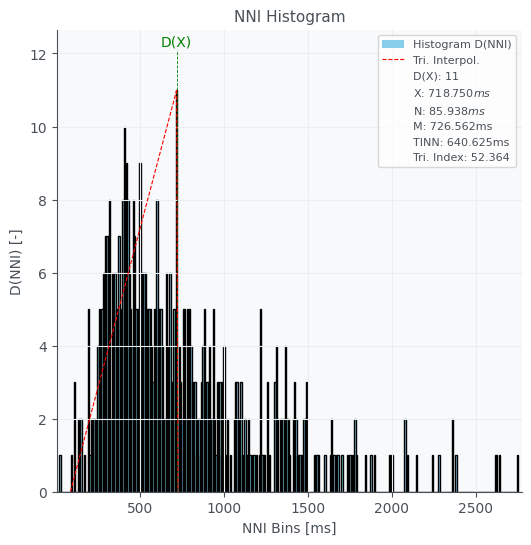

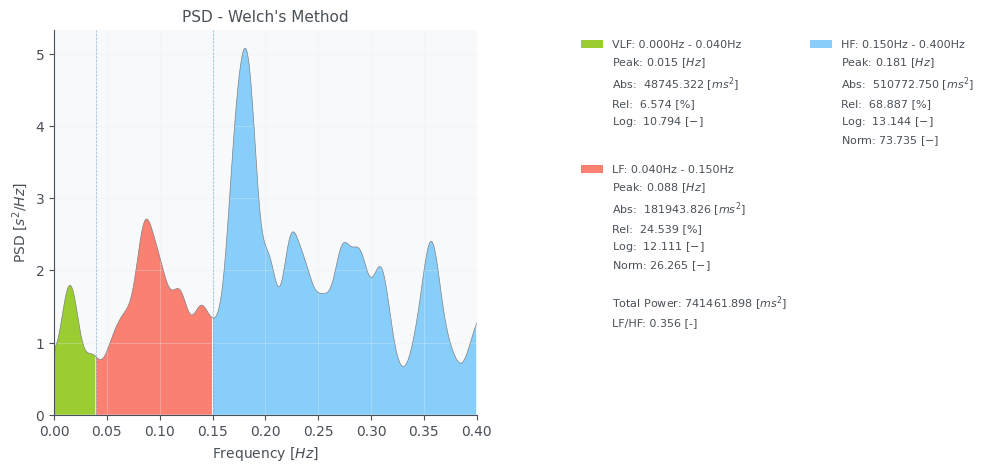

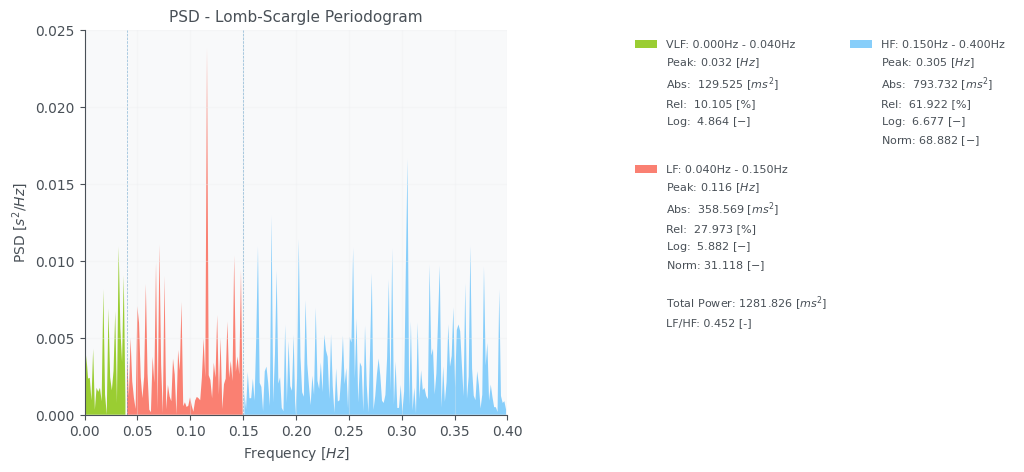

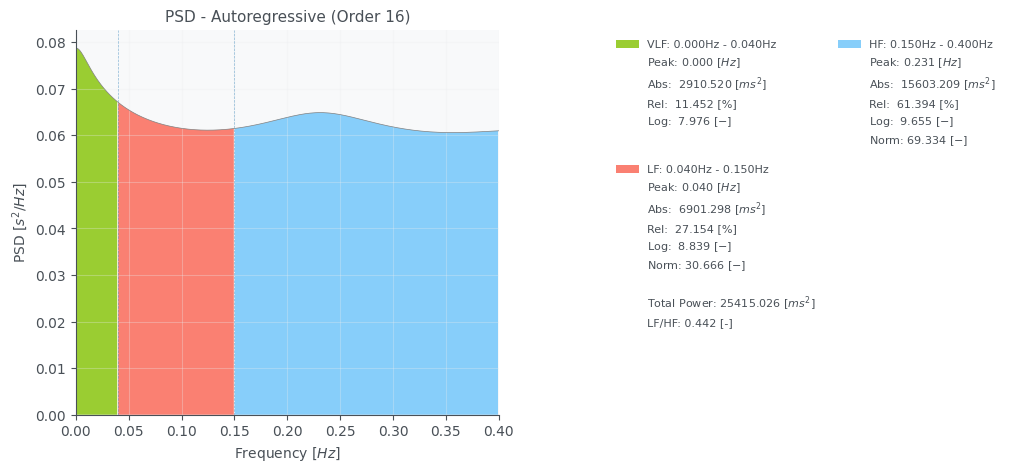

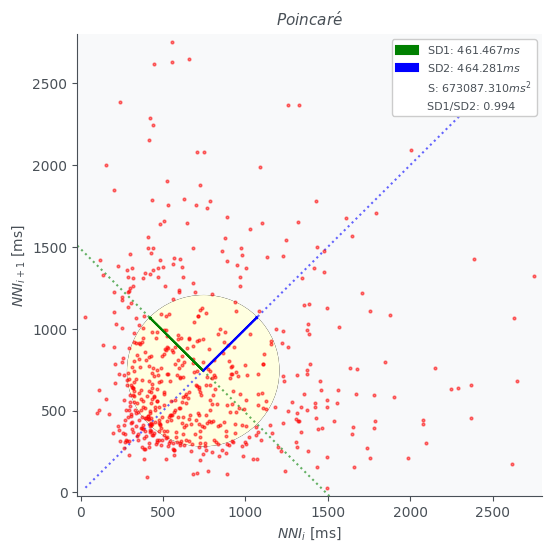

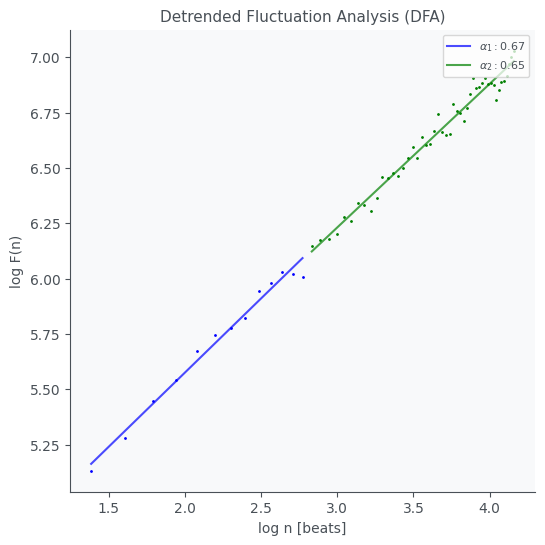

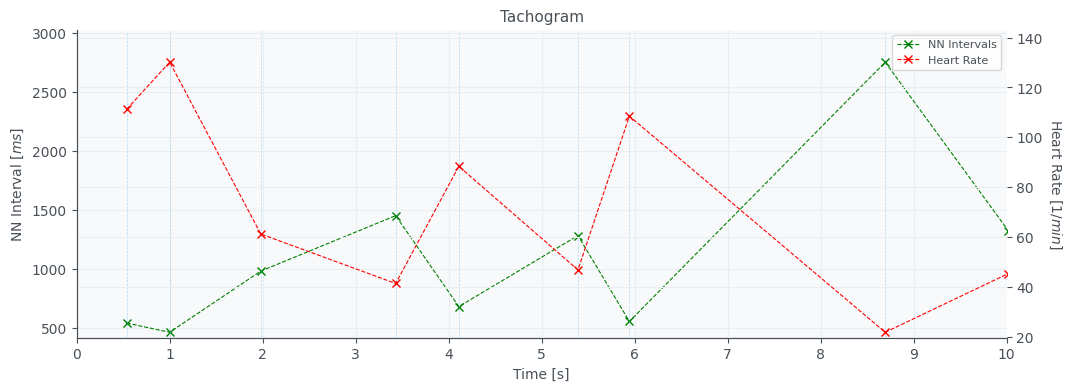

In [22]:
# Specify the file path of your OpenSignals file (absolute file path is recommended)
# fpath = 'out.txt'
# i=0
# with open(fpath) as fp:
#   for line in fp:
#     if i<5:
#       print(line)
#       i+=1
# Load the acquisition file
# acq = OpenSignalsReader(fpath)

# Get the ECG signal
# signal = acq.signal('ECG')

# Filter ECG signal and extract the R-peak locations
# filtered_signal, rpeaks = ecg(signal)[1:3]

# Load the ECG signal data from the Excel file
import pandas as pd
import numpy as np
from biosppy.signals import ecg
from pyhrv import hrv
from pyhrv.tools import hrv_export

df = pd.read_excel("/content/drive/MyDrive/stresss/drive01.xlsx")
df = np.array(df)
df = df.flatten()
print(df.shape)

# Process ECG signal to obtain filtered signal and R-peaks
ecg_results = ecg.ecg(signal=df, sampling_rate=1000., show=False)
filtered_signal = ecg_results['filtered']
rpeaks = ecg_results['rpeaks']

# Compute all HRV parameters with default input parameters
results = hrv(rpeaks=rpeaks)

# Print all the parameter keys and values individually
for key in results.keys():
   print(key, results[key])

# Create HRV report in .TXT format
hrv_export(results, efile='SampleExport', path='/content/drive/MyDrive/stresss/')

In [23]:
!pip install neurokit2

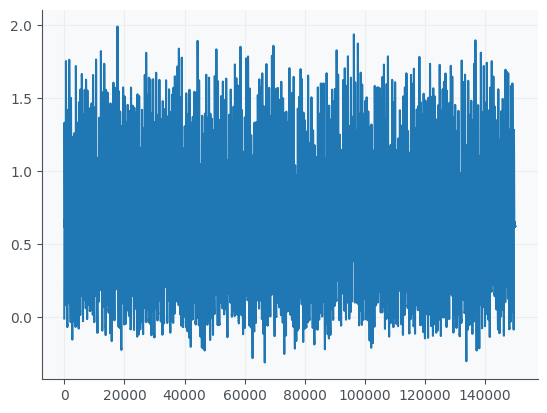

In [24]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
from matplotlib.patches import Ellipse

ppg_simulated=nk.ppg_simulate(duration=300, sampling_rate=500, heart_rate=60)
plt.plot(ppg_simulated)
plt.show()

In [25]:
ppg_and_ecg=nk.data(dataset="bio_resting_5min_100hz")